In [59]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import os
import re
import pypdf

In [60]:
# DOES NOT WORK

# qurl = "https://hsquizbowl.org/db/packets/college/"
# # Get the links to packets for all tournaments
# r = requests.get(qurl)
# soup = BeautifulSoup(r.text, 'html.parser')
# # Get links to packets for all tournaments, that is qurl+hrefnum
# links = [qurl + link.get('href') for link in soup.find_all('a') if link.get('href')[:-1].isdigit()]

# print(links)

In [73]:
# scan pdf

# Get the text from the pdf
pdflink = "https://files.quizbowlpackets.com/3003/15%20-%20Editors%204.pdf"
r = requests.get(pdflink)
with open("packet.pdf", 'wb') as f:
    f.write(r.content)


In [86]:
pdf = pypdf.PdfReader(open("packet.pdf", "rb"))
text = ""
for page in pdf.pages:
    # if first word is "Bonuses", then stop
    if page.extract_text().split()[0].lower() == "bonuses":
        break
    text += page.extract_text()
    # remove newlines
    text = text.replace("\n", " ")

categories = {}

# if any part of the text is of the form "<sometext>", then it is a category and we add it to the dictionary before we encounter the word "bonuses"

for match in re.findall(r'<(.*?)>', text):
    if match not in categories:
        categories[match] = 1
    else:
        categories[match] += 1

print(categories)

{'Arya Karthik, European Literature': 1, 'Geoffrey Wu, Chemistry': 1, 'Victor Pavao, Other Fine Arts': 1, 'Alex Fregeau, Other History': 1, 'Kevin Thomas, Beliefs': 2, 'Henry Atkins, World Literature': 1, 'Itamar Naveh-Benjamin, Biology': 1, 'Alex Fregeau, US History': 1, 'Henry Atkins, Other Academic': 1, 'Mike Bentley, Social Science': 1, 'Arya Karthik, American Literature': 1, 'Alex Fregeau, European History': 1, 'Arya Karthik, Classical Music and Opera': 1, 'Geoffrey Wu, Physics': 1, 'Alex Fregeau, World History': 1, 'Arya Karthik, British Literature': 1, 'Itamar Naveh-Benjamin, Visual Fine Arts': 1, 'Alistair Gray, Other Science - Computer Science': 1, 'Caleb Kendrick, Philosophy': 1}


In [87]:
os.remove("packet.pdf")

In [88]:
# We will do the same for 50 packets and then plot the frequency of each category

# Read packets from the links
# For each packet, get the text
# For each packet, get the categories
# For each category, add to dictionary
# delete packet

with open('links.txt', 'r') as f:
    links = f.read()
links = links.split('\n')

categories = {}

for link in links:
    r = requests.get(link)
    with open("packet.pdf", 'wb') as f:
        f.write(r.content)

    pdf = pypdf.PdfReader(open("packet.pdf", "rb"))
    text = ""
    for page in pdf.pages:
        # if first word is "Bonuses", then stop

        if page.extract_text().split()[0].lower() == "bonuses":
            break
        text += page.extract_text()

    text = text.replace("\n", " ")

    # if any part of the text is of the form "<sometext>", then it is a category and we add it to the dictionary before we encounter the word "bonuses"

    for match in re.findall(r'<(.*?)>', text):
        if match not in categories:
            categories[match] = 1
        else:
            categories[match] += 1

    # delete packet
    os.remove("packet.pdf")

print(categories)

{'Religion': 31, 'European History': 31, 'Chemistry': 32, 'World History': 31, 'Mythology': 31, 'Other Fine Arts': 31, 'European Literature': 32, 'Social Science': 28, 'Physics': 31, 'American Literature': 31, 'Biology': 33, 'Painting and Sculpture': 17, 'World Literature': 17, 'American History': 32, 'Philosophy': 28, 'Classical Music': 31, 'British Literature': 30, 'Other History': 31, 'Other Science': 32, 'Geography': 11, 'Other Academic': 4, 'Current Events': 12, 'Pop Culture': 12, 'Painting/Sculpture': 15, 'World/Other Literature': 14, 'Alex Fregeau, World History': 12, 'John Lawrence, European Literature': 1, 'Eric Mukherjee, Biology': 1, 'Victor Pavao, Other Fine Arts': 8, 'Kevin Thomas, Beliefs': 19, 'Seth Ebner, American Literature': 1, 'Jonathen Settle, Earth Science': 2, 'Will Alston, US History': 1, 'John Lawrence, Classical Music and Opera': 1, 'Will Alston, Social Science': 1, 'John Lawrence, Philosophy': 1, 'John Lawrence, British Literature': 1, 'Tim Morrison, Physics':

In [89]:
print(sum(categories.values()))

1001


{'Biology': 33, 'Chemistry': 32, 'European Literature': 32, 'American History': 32, 'Other Science': 32, 'Religion': 31, 'European History': 31, 'World History': 31, 'Mythology': 31, 'Other Fine Arts': 31, 'Physics': 31, 'American Literature': 31, 'Classical Music': 31, 'Other History': 31, 'British Literature': 30, 'Social Science': 28, 'Philosophy': 28, 'Kevin Thomas, Beliefs': 19, 'Painting and Sculpture': 17, 'World Literature': 17, 'Painting/Sculpture': 15, 'World/Other Literature': 14, 'Current Events': 12, 'Pop Culture': 12, 'Alex Fregeau, World History': 12, 'Geography': 11, 'Henry Atkins, World Literature': 10, 'Arya Karthik, British Literature': 10, 'Caleb Kendrick, Philosophy': 10, 'Alex Fregeau, European History': 10, 'Arya Karthik, European Literature': 9, 'Victor Pavao, Other Fine Arts': 8, 'Alex Fregeau, Other History': 8, 'Henry Atkins, Geography': 8, 'Alex Fregeau, US History': 8, 'Jacob Egol, Classical Music and Opera': 8, 'Alistair Gray, Other Science - Computer Scie

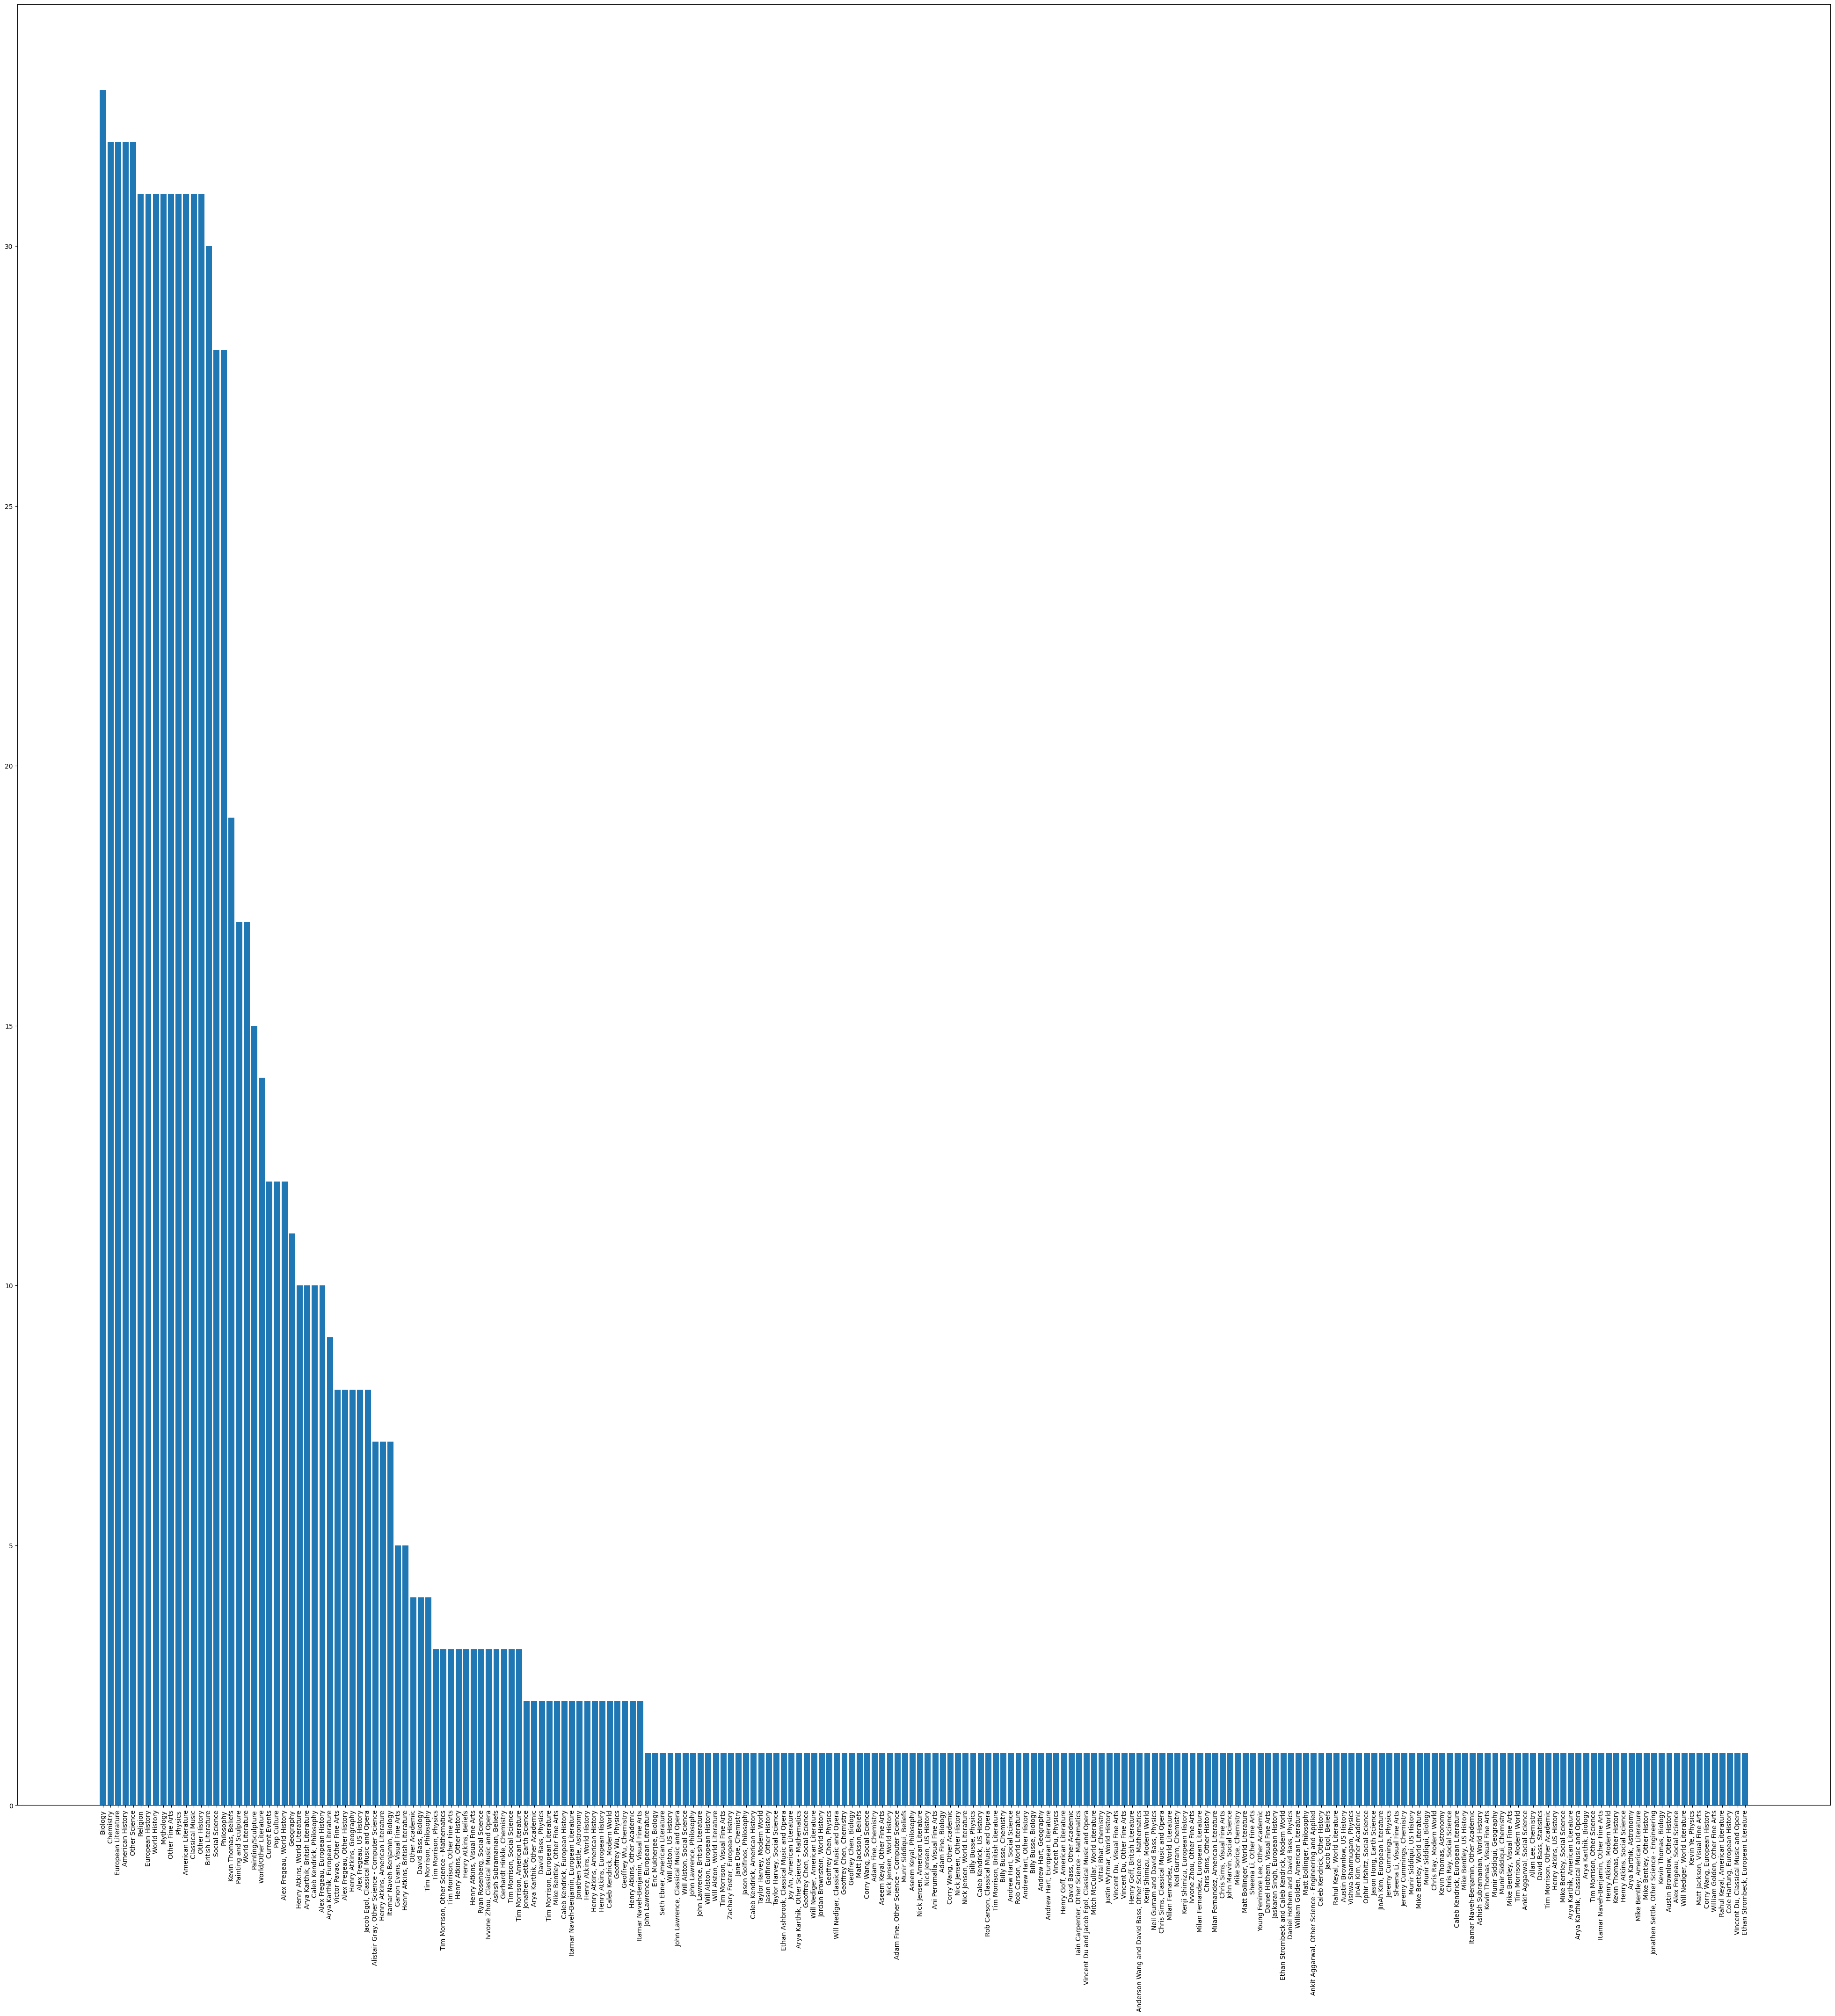

In [99]:
# Plot the frequency of each category
# Sort the dictionary by value
sorted_categories = sorted(categories.items(), key=lambda x: x[1], reverse=True)
sorted_categories = dict(sorted_categories)
print(sorted_categories)

# Plot all categories
plt.figure(figsize=(50, 50))
plt.bar(range(len(sorted_categories)), list(sorted_categories.values()), align='center')
plt.xticks(range(len(sorted_categories)), list(sorted_categories.keys()))
plt.xticks(rotation=90)
plt.savefig('all_categories.png')
plt.show()
